Importing libararies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

# **Dataset(From kaggle)**

In [2]:
data = pd.read_csv('climate_change_dataset.csv')
data.head(5)


,Year,Month,Avg_Temp (°C),Max_Temp (°C),Min_Temp (°C),Precipitation (mm),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),CO2_Concentration (ppm),Latitude,Longitude,Altitude (m),Proximity_to_Water (km),Urbanization_Index,Vegetation_Index,ENSO_Index,Particulate_Matter (µg/m³),Sea_Surface_Temp (°C)
0,NaN,1.0,-3.460516,33.056918907353285,NaN,184.89969755743786,89.62081302618182,9.742885739415993,NaN,58.530797670209076,NaN,40.7128,NaN,10.0,15.0,NaN,0.04423782887418304,0.6336943092843479,33.43707805480527,18.545360112309588
1,2020.0,2.0,NaN,25.901916083791665,3.1739745975583844,2.957244192049635,95.17102000342224,10.64824600272703,252.3136442294677,32.85666516634471,419.595924,40.7128,-74.006,10.0,15.0,99999.000000,0.6128400325468267,NaN,24.504783135571934,15.909586979280654
2,2020.0,3.0,7.869842,18.63424149980029,10.42485208665568,NaN,NaN,NaN,247.39139984511084,29.380233637986674,416.650458,40.7128,-74.006,10.0,15.0,0.341732,0.4665653848003175,-0.4280583600093959,32.3274997743319,21.281093622177334
3,NaN,4.0,-0.049863,13.030562376875533,-9.196433418151315,102.4544605414934,Unknown,0.898697634212508,143.26161801322706,17.496855610388273,418.922808,40.7128,-74.006,10.0,15.0,0.896383,0.030465932726280065,-0.5707078659552114,20.496275820817043,NaN
4,2020.0,5.0,19.895067,35.88212887551623,20.067999652410148,185.72922332959365,73.99994640624561,13.128301152215258,169.5494376964624,2.1937104861995405,401.896588,40.7128,-74.006,10.0,99999.0,0.076173,NaN,-0.2861494705734404,22.64905691725084,15.502968235198333


In [3]:
data.isnull().sum()

,0
Year,5
Month,5
Avg_Temp (°C),7
Max_Temp (°C),7
Min_Temp (°C),8
Precipitation (mm),4
Humidity (%),8
Wind_Speed (m/s),2
Solar_Irradiance (W/m²),5
Cloud_Cover (%),4


<Axes: >

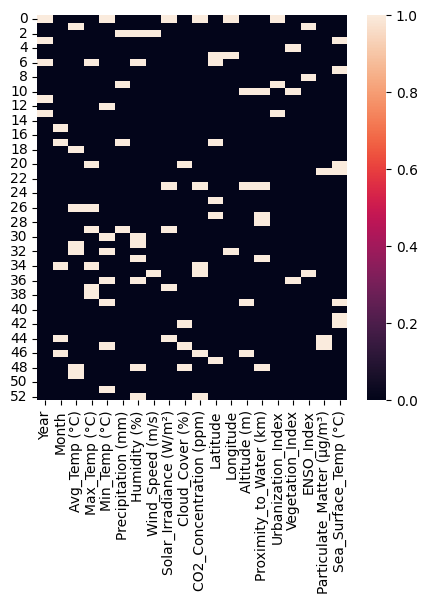

In [4]:
plt.figure(figsize=(5,5))
sns.heatmap(data.isnull())

In [5]:
missing_value_percent = data.isnull().sum() / data.shape[0] * 100
print(missing_value_percent)

Year                           9.433962
Month                          9.433962
Avg_Temp (°C)                 13.207547
Max_Temp (°C)                 13.207547
Min_Temp (°C)                 15.094340
Precipitation (mm)             7.547170
Humidity (%)                  15.094340
Wind_Speed (m/s)               3.773585
Solar_Irradiance (W/m²)        9.433962
Cloud_Cover (%)                7.547170
CO2_Concentration (ppm)       11.320755
Latitude                      11.320755
Longitude                      5.660377
Altitude (m)                   7.547170
Proximity_to_Water (km)       11.320755
Urbanization_Index             5.660377
Vegetation_Index               5.660377
ENSO_Index                     5.660377
Particulate_Matter (µg/m³)     5.660377
Sea_Surface_Temp (°C)         13.207547
dtype: float64


In [6]:
# Assuming your data is in a DataFrame called 'data'

# Specify the columns you want to convert
object_cols = ['Year', 'Month', 'Max_Temp (°C)', 'Min_Temp (°C)', 'Precipitation (mm)', 'Humidity (%)', 'Wind_Speed (m/s)', 'Solar_Irradiance (W/m²)', 'Cloud_Cover (%)', 'Latitude', 'Longitude', 'Altitude (m)', 'Proximity_to_Water (km)', 'Vegetation_Index', 'ENSO_Index', 'Particulate_Matter (µg/m³)', 'Sea_Surface_Temp (°C)']

# Loop through the columns and try to convert to numeric
for col in object_cols:
    # First, try converting, ignoring any errors. This will replace invalid values with NaN
    data[col] = pd.to_numeric(data[col], errors='ignore')

    # Replace 'Unknown' with NaN
    data[col] = data[col].replace('Unknown', pd.NA)

    # Convert object columns to numeric, coercing errors to NaN
    data[col] = pd.to_numeric(data[col], errors='coerce')


# Now check the data types again
print(data.dtypes)

Year                          float64
Month                         float64
Avg_Temp (°C)                 float64
Max_Temp (°C)                 float64
Min_Temp (°C)                 float64
Precipitation (mm)            float64
Humidity (%)                  float64
Wind_Speed (m/s)              float64
Solar_Irradiance (W/m²)       float64
Cloud_Cover (%)               float64
CO2_Concentration (ppm)       float64
Latitude                      float64
Longitude                     float64
Altitude (m)                  float64
Proximity_to_Water (km)       float64
Urbanization_Index            float64
Vegetation_Index              float64
ENSO_Index                    float64
Particulate_Matter (µg/m³)    float64
Sea_Surface_Temp (°C)         float64
dtype: object


In [8]:
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
print(numerical_cols)

['Year', 'Month', 'Avg_Temp (°C)', 'Max_Temp (°C)', 'Min_Temp (°C)', 'Precipitation (mm)', 'Humidity (%)', 'Wind_Speed (m/s)', 'Solar_Irradiance (W/m²)', 'Cloud_Cover (%)', 'CO2_Concentration (ppm)', 'Latitude', 'Longitude', 'Altitude (m)', 'Proximity_to_Water (km)', 'Urbanization_Index', 'Vegetation_Index', 'ENSO_Index', 'Particulate_Matter (µg/m³)', 'Sea_Surface_Temp (°C)']


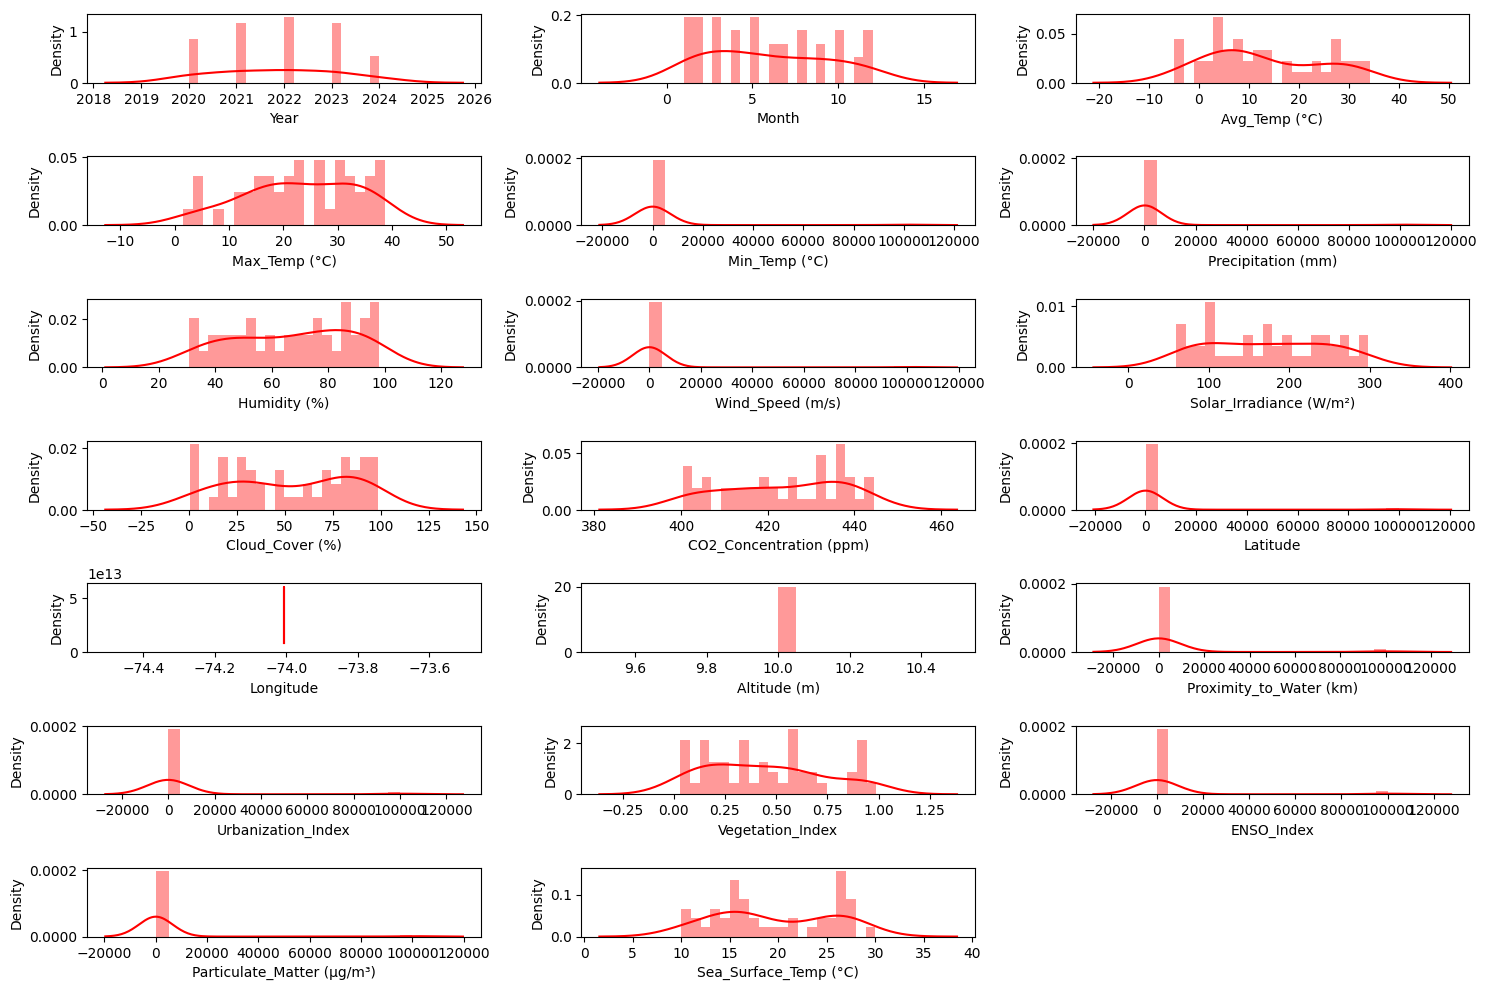

In [10]:
num_rows = len(numerical_cols) // 3 + (len(numerical_cols) % 3 > 0)  # Calculate rows for subplots
num_cols = 3  # Number of columns for subplots
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_cols):
  plt.subplot(num_rows, num_cols, i+1)
  sns.distplot(data[var], bins=20, color = 'red')
plt.tight_layout() # Optional: Adjusts the spacing between subplots
plt.show()

In [11]:
# Calculate the correlation with humidity
humidity_correlation = data.corr()['Humidity (%)']
print("Correlation with Humidity:")
print(humidity_correlation)
# Optionally, sort by absolute correlation to see the strongest relationships
humidity_correlation_sorted = humidity_correlation.abs().sort_values(ascending=False)
print("\nSorted by absolute correlation:")
print(humidity_correlation_sorted)

# Set the correlation threshold
correlation_threshold = 0.1

# Filter columns with low correlation
low_correlation_cols = humidity_correlation[abs(humidity_correlation) < correlation_threshold].index

# Filter columns with null correlation
null_correlation_cols = humidity_correlation[humidity_correlation.isnull()].index

# Combine low and null correlation columns
cols_to_drop = low_correlation_cols.union(null_correlation_cols)

# Drop the columns
dataset = data.drop(columns=cols_to_drop)

# Display the remaining columns

print(dataset.columns)
dataset.head()

Correlation with Humidity:
Year                          0.018150
Month                        -0.181731
Avg_Temp (°C)                -0.083503
Max_Temp (°C)                -0.014017
Min_Temp (°C)                -0.163389
Precipitation (mm)           -0.281952
Humidity (%)                  1.000000
Wind_Speed (m/s)              0.142746
Solar_Irradiance (W/m²)       0.169099
Cloud_Cover (%)              -0.142701
CO2_Concentration (ppm)       0.313752
Latitude                     -0.010323
Longitude                          NaN
Altitude (m)                       NaN
Proximity_to_Water (km)       0.076015
Urbanization_Index            0.226481
Vegetation_Index              0.119681
ENSO_Index                   -0.255876
Particulate_Matter (µg/m³)   -0.258034
Sea_Surface_Temp (°C)        -0.040840
Name: Humidity (%), dtype: float64

Sorted by absolute correlation:
Humidity (%)                  1.000000
CO2_Concentration (ppm)       0.313752
Precipitation (mm)            0.281952
Particul

,Month,Min_Temp (°C),Precipitation (mm),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),CO2_Concentration (ppm),Urbanization_Index,Vegetation_Index,ENSO_Index,Particulate_Matter (µg/m³)
0,1.0,NaN,184.899698,89.620813,9.742886,NaN,58.530798,NaN,NaN,0.044238,0.633694,33.437078
1,2.0,3.173975,2.957244,95.171020,10.648246,252.313644,32.856665,419.595924,99999.000000,0.612840,NaN,24.504783
2,3.0,10.424852,NaN,NaN,NaN,247.391400,29.380234,416.650458,0.341732,0.466565,-0.428058,32.327500
3,4.0,-9.196433,102.454461,NaN,0.898698,143.261618,17.496856,418.922808,0.896383,0.030466,-0.570708,20.496276
4,5.0,20.068000,185.729223,73.999946,13.128301,169.549438,2.193710,401.896588,0.076173,NaN,-0.286149,22.649057


In [12]:
numerical_cols = dataset.select_dtypes(include=['number']).columns.tolist()
print(numerical_cols)

['Month', 'Min_Temp (°C)', 'Precipitation (mm)', 'Humidity (%)', 'Wind_Speed (m/s)', 'Solar_Irradiance (W/m²)', 'Cloud_Cover (%)', 'CO2_Concentration (ppm)', 'Urbanization_Index', 'Vegetation_Index', 'ENSO_Index', 'Particulate_Matter (µg/m³)']


In [16]:
# Fill missing values in specific columns with their respective modes
for column in numerical_cols:  # Replace with your column names
    dataset[column] = dataset[column].fillna(dataset[column].mode()[0])

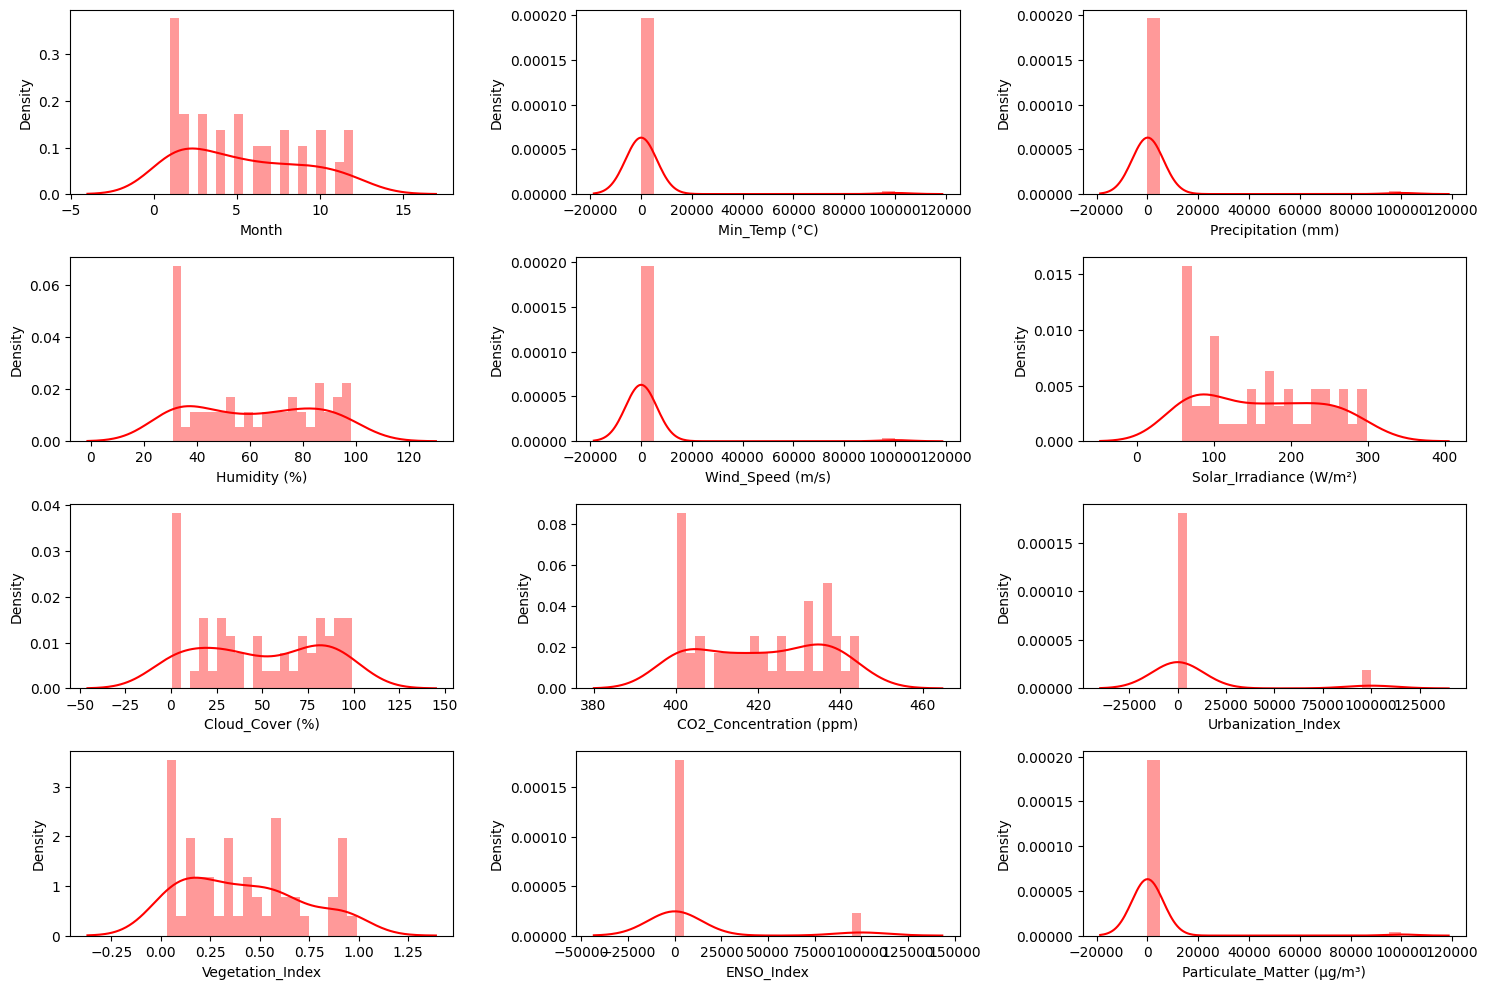

,Month,Min_Temp (°C),Precipitation (mm),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),CO2_Concentration (ppm),Urbanization_Index,Vegetation_Index,ENSO_Index,Particulate_Matter (µg/m³)
0,1.0,-9.196433,184.899698,89.620813,9.742886,59.232808,58.530798,400.351530,99999.000000,0.044238,0.633694,33.437078
1,2.0,3.173975,2.957244,95.171020,10.648246,252.313644,32.856665,419.595924,99999.000000,0.612840,99999.000000,24.504783
2,3.0,10.424852,2.957244,30.871082,0.308558,247.391400,29.380234,416.650458,0.341732,0.466565,-0.428058,32.327500
3,4.0,-9.196433,102.454461,30.871082,0.898698,143.261618,17.496856,418.922808,0.896383,0.030466,-0.570708,20.496276
4,5.0,20.068000,185.729223,73.999946,13.128301,169.549438,2.193710,401.896588,0.076173,0.030466,-0.286149,22.649057


In [17]:
num_rows = len(numerical_cols) // 3 + (len(numerical_cols) % 3 > 0)  # Calculate rows for subplots
num_cols = 3  # Number of columns for subplots
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_cols):
  plt.subplot(num_rows, num_cols, i+1)
  sns.distplot(dataset[var], bins=20, color = 'red')
plt.tight_layout() # Optional: Adjusts the spacing between subplots
plt.show()
dataset.head()

(53, 12)

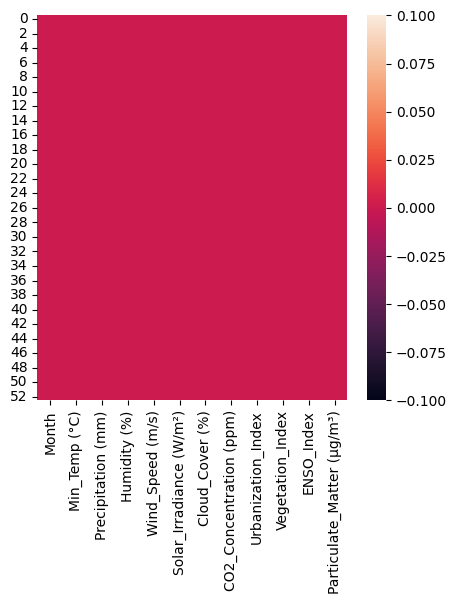

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(dataset.isnull())
dataset.shape

In [66]:
cols = dataset.columns.tolist()

# Move 'Humidity (%)' to the end
cols.remove('Humidity (%)')  # Remove it from its current position
cols.append('Humidity (%)')  # Append it to the end

# Reorder the DataFrame columns
dataset = dataset[cols]

# Display the first few rows with values
data.head()  # To see the first 5 rows

,Year,Month,Avg_Temp (°C),Max_Temp (°C),Min_Temp (°C),Precipitation (mm),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),CO2_Concentration (ppm),Latitude,Longitude,Altitude (m),Proximity_to_Water (km),Urbanization_Index,Vegetation_Index,ENSO_Index,Particulate_Matter (µg/m³),Sea_Surface_Temp (°C),Humidity (%)
0,NaN,1.0,-3.460516,33.056919,-9.196433,184.899698,9.742886,59.232808,58.530798,400.351530,40.7128,NaN,10.0,15.0,99999.000000,0.044238,0.633694,33.437078,18.545360,89.620813
1,2020.0,2.0,NaN,25.901916,3.173975,2.957244,10.648246,252.313644,32.856665,419.595924,40.7128,-74.006,10.0,15.0,99999.000000,0.612840,99999.000000,24.504783,15.909587,95.171020
2,2020.0,3.0,7.869842,18.634241,10.424852,2.957244,0.308558,247.391400,29.380234,416.650458,40.7128,-74.006,10.0,15.0,0.341732,0.466565,-0.428058,32.327500,21.281094,30.871082
3,NaN,4.0,-0.049863,13.030562,-9.196433,102.454461,0.898698,143.261618,17.496856,418.922808,40.7128,-74.006,10.0,15.0,0.896383,0.030466,-0.570708,20.496276,NaN,30.871082
4,2020.0,5.0,19.895067,35.882129,20.068000,185.729223,13.128301,169.549438,2.193710,401.896588,40.7128,-74.006,10.0,99999.0,0.076173,0.030466,-0.286149,22.649057,15.502968,73.999946


In [67]:
from sklearn.preprocessing import StandardScaler

# Now apply StandardScaler
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)
print(dataset_scaled[:10])

[[-1.20067119 -0.13974395 -0.13226259 -0.13855216 -1.3055108   0.30147888
  -1.38420122  3.09838668 -1.25153176 -0.35727748 -0.13826238  1.21843283]
 [-0.92637993 -0.13883469 -0.14564801 -0.13848562  1.17498485 -0.45931445
  -0.08517636  3.09838668  0.68955158  2.79880927 -0.13891907  1.45544905]
 [-0.65208867 -0.13830173 -0.14564801 -0.13924563  1.11174913 -0.56233043
  -0.2839996  -0.32275535  0.19020198 -0.35731099 -0.13834395 -1.29041754]
 [-0.3777974  -0.13974395 -0.13832805 -0.13920225 -0.22599871 -0.91446675
  -0.13061267 -0.32273638 -1.29854599 -0.35731549 -0.13921377 -1.29041754]
 [-0.10350614 -0.13759294 -0.13220156 -0.13830332  0.11171903 -1.36793994
  -1.27990756 -0.32276444 -1.29854599 -0.35730651 -0.1390555   0.55135884]
 [ 0.17078513 -0.13747347 -0.14393098 -0.13906352 -0.02698928  1.41341472
  -1.38420122 -0.32274202 -1.25351908 -0.35730501 -0.13878335 -1.08734447]
 [ 0.44507639 -0.13973675 -0.14417465 -0.13845705  0.52474154 -1.34821374
  -0.62767343 -0.3227609   1.742

# Spliting dataset(here making use of humidity)

In [68]:
from sklearn.model_selection import train_test_split

# Convert dataset_scaled back to DataFrame
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns)

X = dataset_scaled.drop('Humidity (%)', axis=1)
Y = dataset_scaled['Humidity (%)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(45, 11)
(8, 11)
(45,)
(8,)


# Data Scaling

In [70]:
scaler1 = StandardScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

# Training model

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
model = RandomForestRegressor(n_estimators=1000, random_state=42)

In [72]:
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

# Predicting a new result

In [73]:
Y_pred = model.predict(X_test)
print(Y_pred)
print(Y_test)

[-0.22121311  0.61141481 -0.23021821  0.86312661  0.28289633 -0.63831869
 -0.62772476 -0.20024735]
19    1.420264
41    0.311130
47    0.668332
12    0.273736
43    0.499072
5    -1.087344
17    1.019830
50    1.578665
Name: Humidity (%), dtype: float64


# Mean Abs/Sqr Error

In [74]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 0.9401714243712601
Mean Squared Error: 1.2583391716469023


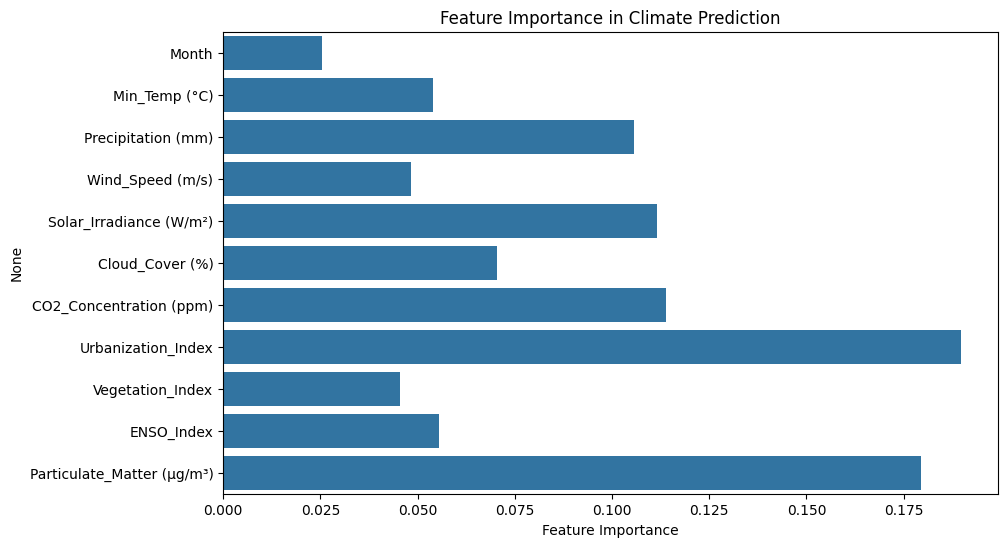

In [75]:
import seaborn as sns
importance = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Climate Prediction')
plt.show()

In [76]:
print(X_test[[0]],Y_test.iloc[0])

[[ 0.72908262 -0.15019736 -0.14744335 -0.15052173  1.07274101  1.00229679
   0.8149333  -0.35354639  0.48452406 -0.39225599 -0.14936766]] 1.4202638818967148


# Startegies

# Linear Regression

In [82]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression

# Replace 'Unknown' with NaN in the relevant columns
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Avg_Temp (°C)'] = pd.to_numeric(data['Avg_Temp (°C)'], errors='coerce')

# Drop rows with NaN values in 'Year' or 'Avg_Temp (°C)'
data.dropna(subset=['Year', 'Avg_Temp (°C)'], inplace=True)

# Prepare data for linear regression
temp_model = LinearRegression()
humidity_model = LinearRegression()

X = data['Year'].values.reshape(-1, 1)
y_temp = data['Avg_Temp (°C)']
y_humidity = data['Humidity (%)']

# ----> Drop NaN values from y_humidity and corresponding X and y_temp values <----
# Create a mask for non-NaN values in y_humidity
mask = y_humidity.notna()

# Apply the mask to X, y_temp and y_humidity
X = X[mask]
y_temp = y_temp[mask]  # Apply mask to y_temp as well
y_humidity = y_humidity[mask]

# Fit the models
temp_model.fit(X, y_temp)  # Fit temperature model
humidity_model.fit(X, y_humidity)  # Fit humidity model


LinearRegression()

     Year  Predicted Avg_Temp (°C)  Predicted Humidity (%)  \
0  2025.0                14.385987               59.302848   
1  2026.0                14.583161               58.704384   
2  2027.0                14.780336               58.105919   
3  2028.0                14.977510               57.507455   
4  2029.0                15.174685               56.908991   
5  2030.0                15.371859               56.310526   
6  2031.0                15.569034               55.712062   
7  2032.0                15.766209               55.113597   
8  2033.0                15.963383               54.515133   
9  2034.0                16.160558               53.916668   

                        Climate Strategy  
0  Normal Conditions: Monitor regularly.  
1  Normal Conditions: Monitor regularly.  
2  Normal Conditions: Monitor regularly.  
3  Normal Conditions: Monitor regularly.  
4  Normal Conditions: Monitor regularly.  
5  Normal Conditions: Monitor regularly.  
6  Normal Condit

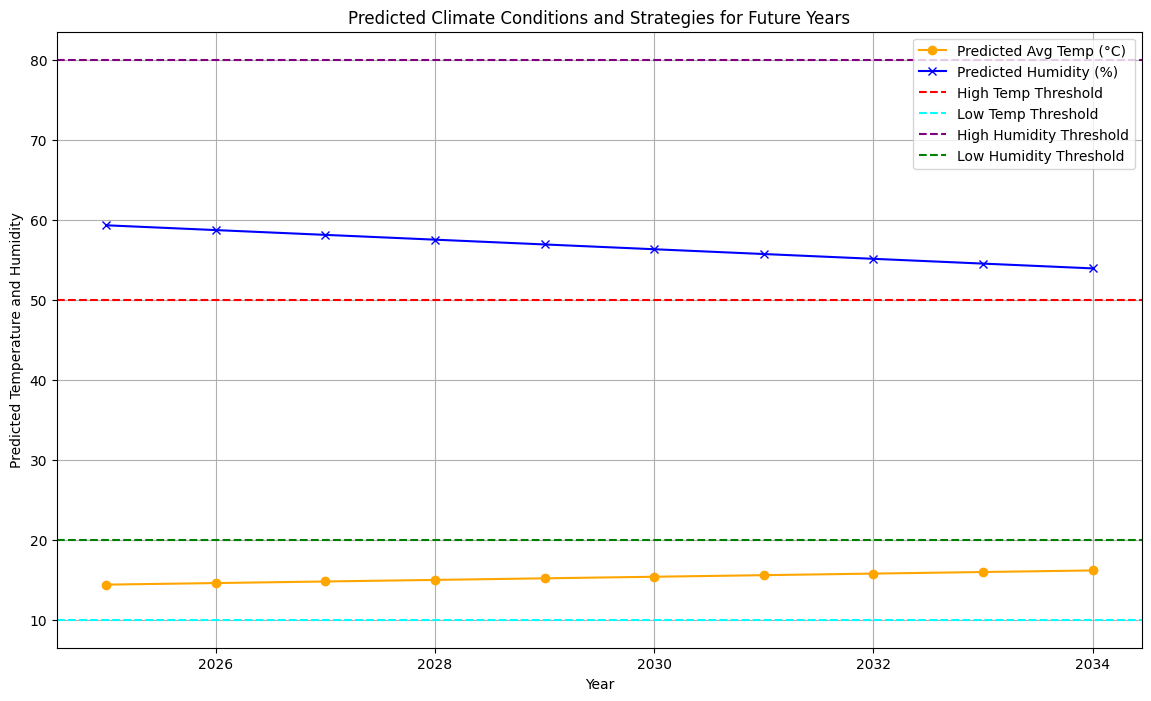

In [86]:
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Drop rows with NaN values in 'Year' column (if any) introduced by conversion.
data.dropna(subset=['Year'], inplace=True)

# Now calculate future_years
future_years = np.arange(data['Year'].max() + 1, data['Year'].max() + 11).reshape(-1, 1)  # Predict for next 10 year

# Predict future temperature and humidity
future_temp = temp_model.predict(future_years)
future_humidity = humidity_model.predict(future_years)

# Compile predictions into a DataFrame
future_data = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Avg_Temp (°C)': future_temp,
    'Predicted Humidity (%)': future_humidity
})
temp_threshold_high = 50
temp_threshold_low = 10
humidity_threshold_high = 80
humidity_threshold_low = 20
# Apply the strategy function on the future data
def climate_strategy_pred(temp, humidity):
    if temp > temp_threshold_high and humidity < humidity_threshold_low:
        return "Drought Risk: Recommend water conservation and agricultural support."
    elif temp > temp_threshold_high and humidity > humidity_threshold_high:
        return "Heatwave Risk: Recommend heat warnings, cooling centers, and health advisories."
    elif temp < temp_threshold_low and humidity < humidity_threshold_low:
        return "Cold and Dry: Recommend heating solutions and air moisture management."
    elif temp < temp_threshold_low and humidity > humidity_threshold_high:
        return "Cold and Humid: Recommend health advisories for mold and respiratory issues."
    else:
        return "Normal Conditions: Monitor regularly."

# Apply strategies to future predictions
future_data['Climate Strategy'] = future_data.apply(lambda row: climate_strategy_pred(row['Predicted Avg_Temp (°C)'], row['Predicted Humidity (%)']), axis=1)

# Display predictions and strategies
print(future_data)

# Visualization of future predictions
plt.figure(figsize=(14, 8))
plt.plot(future_data['Year'], future_data['Predicted Avg_Temp (°C)'], marker='o', label='Predicted Avg Temp (°C)', color='orange')
plt.plot(future_data['Year'], future_data['Predicted Humidity (%)'], marker='x', label='Predicted Humidity (%)', color='blue')
plt.axhline(y=temp_threshold_high, color='red', linestyle='--', label='High Temp Threshold')
plt.axhline(y=temp_threshold_low, color='cyan', linestyle='--', label='Low Temp Threshold')
plt.axhline(y=humidity_threshold_high, color='purple', linestyle='--', label='High Humidity Threshold')
plt.axhline(y=humidity_threshold_low, color='green', linestyle='--', label='Low Humidity Threshold')
plt.xlabel('Year')
plt.ylabel('Predicted Temperature and Humidity')
plt.title('Predicted Climate Conditions and Strategies for Future Years')
plt.legend()
plt.grid()
plt.show()